In [1]:
# Imports generales
import pandas as pd
import io
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import cluster
import sklearn.metrics
from sklearn.cluster import DBSCAN
from sklearn.neighbors import kneighbors_graph
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

from sklearn.metrics import davies_bouldin_score


In [2]:
path = 'D:/Usuario/Documentos/000.Trabajo_Fin_Master/Bases_datos/'

In [ ]:
base = pd.read_excel(path + 'Base_ppal.xlsx')
base.shape


,ID,ENTIDAD,ESTADO,CLASIFICACION,SEXO,EDAD_GRUPO,EDAD_QUINQ,EDAD_JUD,CICLO_VIT,EST_CIVIL,...,PAIS_DES,DEPTO,DEPTO_DES,MPIO,MPIO_DES,ZONA_DES,CONTEXTO,LOCALIDAD_BOG,Latitud,Longitud
0,1,Instituto Nacional de Medicina Legal y Ciencia...,Desaparecido,Sin informaciÃ³n,Hombre,b) Mayores de Edad (>18 aÃ±os),(20 a 24),(20 a 24),(18 a 28) Juventud,Soltero (a),...,Colombia,11,BogotÃ¡ D.C.,11001,BogotÃ¡ D.C.,Cabecera municipal,DesapariciÃ³n,NaN,"4,649251","-74,106992"
1,2,Instituto Nacional de Medicina Legal y Ciencia...,Desaparecido,Sin informaciÃ³n,Hombre,b) Mayores de Edad (>18 aÃ±os),(20 a 24),(20 a 24),(18 a 28) Juventud,Soltero (a),...,Colombia,11,BogotÃ¡ D.C.,11001,BogotÃ¡ D.C.,Cabecera municipal,DesapariciÃ³n,NaN,"4,649251","-74,106992"
2,3,Instituto Nacional de Medicina Legal y Ciencia...,Desaparecido,Sin informaciÃ³n,Mujer,a) Menores de Edad (<18 aÃ±os),(10 a 14),(10 a 13),(12 a 17) Adolescencia,Soltero (a),...,Colombia,11,BogotÃ¡ D.C.,11001,BogotÃ¡ D.C.,Cabecera municipal,DesapariciÃ³n,NaN,"4,649251","-74,106992"
3,4,Instituto Nacional de Medicina Legal y Ciencia...,Aparecio vivo,Sin informaciÃ³n,Mujer,a) Menores de Edad (<18 aÃ±os),(15 a 17),(14 a 17),(12 a 17) Adolescencia,Soltero (a),...,Colombia,11,BogotÃ¡ D.C.,11001,BogotÃ¡ D.C.,Cabecera municipal,DesapariciÃ³n,NaN,"4,649251","-74,106992"
4,5,Instituto Nacional de Medicina Legal y Ciencia...,Aparecio vivo,Sin informaciÃ³n,Hombre,b) Mayores de Edad (>18 aÃ±os),(70 a 74),(70 a 74),(MÃ¡s de 60) Adulto Mayor,UniÃ³n Libre,...,Colombia,11,BogotÃ¡ D.C.,11001,BogotÃ¡ D.C.,Cabecera municipal,DesapariciÃ³n,NaN,"4,649251","-74,106992"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190901,193048,Unidad de BÃºsqueda de Personas Desaparecidas,Desaparecido,Sin informaciÃ³n,Hombre,b) Mayores de Edad (>18 aÃ±os),(25 a 29),(25 a 28),(18 a 28) Juventud,Soltero (a),...,Colombia,95,Guaviare,95001,San JosÃ© Del Guaviare,Parte rural (vereda y campo),DesapariciÃ³n,Rural,"2,565932","-72,639254"
190902,193049,Unidad de BÃºsqueda de Personas Desaparecidas,Desaparecido,Sin informaciÃ³n,Hombre,b) Mayores de Edad (>18 aÃ±os),(18 a 19),(18 a 19),(18 a 28) Juventud,Soltero (a),...,Colombia,5,Antioquia,5250,El Bagre,Cabecera municipal,DesapariciÃ³n,NaN,"7,5975","-74,799097"
190903,193050,Unidad de BÃºsqueda de Personas Desaparecidas,Desaparecido,Sin informaciÃ³n,Hombre,b) Mayores de Edad (>18 aÃ±os),(20 a 24),(20 a 24),(18 a 28) Juventud,Sin InformaciÃ³n,...,Colombia,68,Santander,68235,El Carmen De Chucuri,Sin informaciÃ³n,DesapariciÃ³n,Rural disperso,"6,700038","-73,51066"
190904,193051,Unidad de BÃºsqueda de Personas Desaparecidas,Desaparecido,DesapariciÃ³n presuntamente forzada,Mujer,b) Mayores de Edad (>18 aÃ±os),(25 a 29),(25 a 28),(18 a 28) Juventud,Sin InformaciÃ³n,...,Colombia,68,Santander,68235,El Carmen De Chucuri,Sin informaciÃ³n,DesapariciÃ³n,Rural disperso,"6,700038","-73,51066"


In [8]:
base.drop(columns=['ID'], inplace=True)

In [9]:
base.drop_duplicates(inplace=True)
base.shape

(188980, 31)

In [17]:
print("los registros eliminados son: ",190906- base.shape[0])

print("que corresponde a: ",1926/190906*100,"%")



los registros eliminados son:  1926
que corresponde a:  1.0088734769991514 %


# Inicio del preprocesamiento
## <strong style = "color: red; font-size: 12">Variables con las que cuento</strong>


De acuerdo con el análisis de datos faltantes, encuentro que las variables:

-   ID_GNRO
-   ORIENTACION
-   TRANS
-   PUEBLO_INDIG
-   PRT_ETN
-   PRT_GRUP
-   PAIS_NAC
-   PAIS_DES
-   CONTEXTO
-   LOCALIDAD_BOG

Deberían quitarse por falta de completitud

In [4]:
base.columns

Index(['ID', 'ENTIDAD', 'ESTADO', 'CLASIFICACION', 'SEXO', 'EDAD_GRUPO',
       'EDAD_QUINQ', 'EDAD_JUD', 'CICLO_VIT', 'EST_CIVIL', 'ESCOLARIDAD',
       'ID_GNRO', 'ORIENT', 'TRANS', 'PUEBLO_INDIG', 'PRT_ETN', 'PRT_GRUP',
       'PAIS_NAC', 'FECHA_DES', 'ANIO_DES', 'MES_DES', 'DIA_DES', 'PAIS_DES',
       'DEPTO', 'DEPTO_DES', 'MPIO', 'MPIO_DES', 'ZONA_DES', 'CONTEXTO',
       'LOCALIDAD_BOG', 'Latitud', 'Longitud'],
      dtype='object')

In [5]:
print(base.groupby('ENTIDAD')['ID'].count().sort_values(ascending=False))
print('------------------------------')
print(base.groupby('CLASIFICACION')['ID'].count().sort_values(ascending=False))
print('------------------------------')
print(base.groupby('ESTADO')['ID'].count().sort_values(ascending=False))
print('------------------------------')
print(base.groupby('SEXO')['ID'].count().sort_values(ascending=False))
print('------------------------------')
print(base.groupby('EDAD_GRUPO')['ID'].count().sort_values(ascending=False))
print('------------------------------')
print(base.groupby('EDAD_QUINQ')['ID'].count().sort_values(ascending=False))
print('------------------------------')
print(base.groupby('EDAD_JUD')['ID'].count().sort_values(ascending=False))
print('------------------------------')
print(base.groupby('CICLO_VIT')['ID'].count().sort_values(ascending=False))
print('------------------------------')
print(base.groupby('EST_CIVIL')['ID'].count().sort_values(ascending=False))
print('------------------------------')
print(base.groupby('ESCOLARIDAD')['ID'].count().sort_values(ascending=False))
print('------------------------------')
print(base.groupby('ID_GNRO')['ID'].count().sort_values(ascending=False))
print('------------------------------')
print(base.groupby('ORIENT')['ID'].count().sort_values(ascending=False))
print('------------------------------')
print(base.groupby('TRANS')['ID'].count().sort_values(ascending=False))
print('------------------------------')
print(base.groupby('PUEBLO_INDIG')['ID'].count().sort_values(ascending=False))
print('------------------------------')
print(base.groupby('PRT_ETN')['ID'].count().sort_values(ascending=False))
print('------------------------------')
print(base.groupby('PRT_GRUP')['ID'].count().sort_values(ascending=False))
print('------------------------------')
print(base.groupby('PAIS_NAC')['ID'].count().sort_values(ascending=False))
print('------------------------------')
print(base.groupby('FECHA_DES')['ID'].count().sort_values(ascending=False))
print('------------------------------')
print(base.groupby('ANIO_DES')['ID'].count().sort_values(ascending=False))
print('------------------------------')
print(base.groupby('MES_DES')['ID'].count().sort_values(ascending=False))
print('------------------------------')
print(base.groupby('DIA_DES')['ID'].count().sort_values(ascending=False))
print('------------------------------')
print(base.groupby('PAIS_DES')['ID'].count().sort_values(ascending=False))
print('------------------------------')
print(base.groupby('DEPTO')['ID'].count().sort_values(ascending=False))
print('------------------------------')
print(base.groupby('DEPTO_DES')['ID'].count().sort_values(ascending=False))
print('------------------------------')
print(base.groupby('MPIO')['ID'].count().sort_values(ascending=False))
print('------------------------------')
print(base.groupby('MPIO_DES')['ID'].count().sort_values(ascending=False))
print('------------------------------')
print(base.groupby('ZONA_DES')['ID'].count().sort_values(ascending=False))
print('------------------------------')
print(base.groupby('CONTEXTO')['ID'].count().sort_values(ascending=False))
print('------------------------------')
print(base.groupby('LOCALIDAD_BOG')['ID'].count().sort_values(ascending=False))

ENTIDAD
FiscalÃ­a - Cuerpo TÃ©cnico InvestigaciÃ³n                    73639
Instituto Nacional de Medicina Legal y Ciencias Forenses      70037
FiscalÃ­a General de la NaciÃ³n                               15942
FiscalÃ­a - Unidad Justicia y Paz                             12010
PolicÃ­a Nacional                                              8094
Unidad de BÃºsqueda de Personas Desaparecidas                  2983
ComisiÃ³n BÃºsqueda Personas Desaparecidas                     2656
FiscalÃ­a - DesapariciÃ³n Forzada y Desplazamiento Forzado     1988
PersonerÃ­a                                                    1263
Centro de IdentificaciÃ³n Humana                                713
FiscalÃ­a - UNDDHH y DIH                                        507
DefensorÃ­a del Pueblo                                          314
FiscalÃ­a - Unidad Nacional Desmovilizados                      257
Ministerio de Defensa                                           202
ASFADDES Colombia                       

In [6]:
base.columns

Index(['ID', 'ENTIDAD', 'ESTADO', 'CLASIFICACION', 'SEXO', 'EDAD_GRUPO',
       'EDAD_QUINQ', 'EDAD_JUD', 'CICLO_VIT', 'EST_CIVIL', 'ESCOLARIDAD',
       'ID_GNRO', 'ORIENT', 'TRANS', 'PUEBLO_INDIG', 'PRT_ETN', 'PRT_GRUP',
       'PAIS_NAC', 'FECHA_DES', 'ANIO_DES', 'MES_DES', 'DIA_DES', 'PAIS_DES',
       'DEPTO', 'DEPTO_DES', 'MPIO', 'MPIO_DES', 'ZONA_DES', 'CONTEXTO',
       'LOCALIDAD_BOG', 'Latitud', 'Longitud'],
      dtype='object')

In [7]:
variables_quitar = ['ID', 'ENTIDAD', 'ESTADO', 'CLASIFICACION', 'SEXO', 'EDAD_GRUPO',
       'EDAD_QUINQ', 'CICLO_VIT', 'EST_CIVIL', 'ESCOLARIDAD',
       'PRT_GRUP', 'FECHA_DES', 'ANIO_DES', 'MES_DES', 'DIA_DES', 'PAIS_DES',
       'DEPTO', 'DEPTO_DES', 'MPIO', 'MPIO_DES', 'ZONA_DES']

base_dep = base[variables_quitar]

base_dep['FECHA_DES'] = pd.to_datetime(base_dep['FECHA_DES']).dt.date

C:\Users\juan.bonilla\AppData\Local\Temp\ipykernel_16428\2881704821.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_dep['FECHA_DES'] = pd.to_datetime(base_dep['FECHA_DES']).dt.date


In [8]:
# Renombrar variable clasificación 


reemplazos = { 
              'Sin informaciÃ³n': 'SIN_INFO',
       'DesapariciÃ³n presuntamente forzada':'DES_FORZ' }

base_dep['CLASIFICACION'] = base_dep['CLASIFICACION'].replace(reemplazos)


# Renombrar variable clasificación 


reemplazos = { 
              'b) Mayores de Edad (>18 aÃ±os)': 'Mayores_edad',
       'Menores de Edad (<18 aÃ±os)':'Menores_edad' }

base_dep['EDAD_GRUPO'] = base_dep['EDAD_GRUPO'].replace(reemplazos)


#Ciclo vital

reemplazos = { 
              '(18 a 28) Juventud': 'Juventud',
       '(12 a 17) Adolescencia':'Adolescencia',
       '(MÃ¡s de 60) Adulto Mayor':'Adulto_mayor',
       '(29 a 59) Adultez': 'Adultez',
       '(06 a 11) Infancia': 'Infancia',
       '(00 a 05) Primera Infancia': 'Primera_infancia',
       'Sin infromaciÃ³n': 'SIN_INFO' }


base_dep['CICLO_VIT'] = base_dep['CICLO_VIT'].replace(reemplazos)


#Estado civil

reemplazos = { 
              'Soltero (a)': 'Soltero',
       'UniÃ³n Libre':'Union_libre',
       'Sin InformaciÃ³n':'SIN_INFO',
       'Casado (a)': 'Casado',
       'No Aplica': 'SIN_INFO',
       'Separado(a),Divorciado(a)': 'Separado/Divorc',
       'Viudo (a)': 'Viudo' }


base_dep['EST_CIVIL'] = base_dep['EST_CIVIL'].replace(reemplazos)



#Estado civil

reemplazos = { 
              'EducaciÃ³n tÃ©cnica profesional y tecnolÃ³gica': 'profesional',
       'EducaciÃ³n bÃ¡sica secundaria o secundaria baja':'basica_secundaria',       
       'EducaciÃ³n bÃ¡sica primaria':'primaria',
       'EducaciÃ³n media o secundaria alta':'secundaria',
       'Universitario': 'Universitario',
       'Sin informaciÃ³n': 'SIN_INFO',
       'Sin escolaridad': 'Sin escolaridad',
       'EducaciÃ³n inicial y educaciÃ³n preescolar': 'inicial y preescolar',
       'EspecializaciÃ³n, MaestrÃ\xada o equivalente': 'master o especializacion',
       'Doctorado o equivalente':'doctorado' }


base_dep['ESCOLARIDAD'] = base_dep['ESCOLARIDAD'].replace(reemplazos)

reemplazos = {
       'Cabecera municipal':'cabec_mpal', 
       'Sin informaciÃ³n': 'SIN_INFO',
       'Parte rural (vereda y campo)': 'Rural',
       'Centro poblado (corregimiento, inspecciÃ³n de policÃ\xada y caserÃ\xado)':'Corr_Inspecc_Caser'}

base_dep['ZONA_DES'] = base_dep['ZONA_DES'].replace(reemplazos)


reemplazos = {
       'Persona adicta a una droga natural o sintÃ©tica': 'Adicto', 
       'Ninguno':'Ninguno',
       'Otro': 'Otro', 
       'Persona habitante de la calle': 'Hab_calle', 
       'Sin informaciÃ³n': 'Ninguno',
       'Personas en situaciÃ³n de prostituciÃ³n':'Prosti', 
       'Maestro/Educador':'Maestro',
       'Comunidad LGBT':'LGBT', 
       'Persona en condiciÃ³n de desplazamiento': 'Desplaz',
       'Presunto colaborador de grupo ilegal': 'grupo_ilegal', 
       'Personas bajo custodia': 'Bajo_cust',
       'Grupos Ã©tnicos':'Etnicos', 
       'Personas desmovilizadas o reinsertadas':'Desmoviliz',
       'Ex convictos (as)':'Ex_conv',
       'Campesinos (as) y/o trabajadores (as) del campo':'Campesino',
       'Personas que ejercen actividades relacionadas con la salud en zonas de conflicto':'Medic_conflicto',
       'LÃ\xadder':'Lider', 
       'Personas que ejercen actividades polÃ\xadticas':'Lider/politico',
       'Religiosos':'Religioso',
       'Personas que ejercen actividades gremiales o sindicales':'sindicato',
       'Personas que ejercen actividades de periodismo':'periodista',
       'Miembros de Organizaciones No Gubernamentales (ONG)':'ONG',
       'Funcionarios judiciales':'funcionario',
       'Herido y/o enfermo bajo protecciÃ³n sanitaria o mÃ©dica':'Herido',
       'MÃºltiples factores':'Ninguno', 
       'Concejales':'Concejal', 
       'Servidor pÃºblico':'Servidor_publico',
       'Recicladores':'Reciclador', 
       'Personas con capacidades diferentes':'Ninguno'}

base_dep['PRT_GRUP'] = base_dep['PRT_GRUP'].replace(reemplazos)



C:\Users\juan.bonilla\AppData\Local\Temp\ipykernel_16428\116934765.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_dep['CLASIFICACION'] = base_dep['CLASIFICACION'].replace(reemplazos)
C:\Users\juan.bonilla\AppData\Local\Temp\ipykernel_16428\116934765.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_dep['EDAD_GRUPO'] = base_dep['EDAD_GRUPO'].replace(reemplazos)
C:\Users\juan.bonilla\AppData\Local\Temp\ipykernel_16428\116934765.py:33: SettingWithCopyWarning: 
A value is trying to be set on a

In [12]:
base_dep.to_excel(path + 'Base_modelado.xlsx')

Ya está la base con categorías depuradas

##  <strong style = "color: red" >Análisis descriptivo</strong>

### <strong style = "color: red" >Valores faltantes</strong>


In [112]:
train = base_dep

In [113]:
print(train.info())

print(train.describe())

print(train.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192923 entries, 0 to 192922
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             192923 non-null  int64  
 1   ENTIDAD        192923 non-null  object 
 2   ESTADO         192923 non-null  object 
 3   CLASIFICACION  192923 non-null  object 
 4   SEXO           192923 non-null  object 
 5   EDAD_GRUPO     192923 non-null  object 
 6   EDAD_QUINQ     192923 non-null  object 
 7   CICLO_VIT      192923 non-null  object 
 8   EST_CIVIL      192923 non-null  object 
 9   ESCOLARIDAD    192923 non-null  object 
 10  PRT_GRUP       192923 non-null  object 
 11  FECHA_DES      192923 non-null  object 
 12  ANIO_DES       192923 non-null  int64  
 13  MES_DES        192923 non-null  object 
 14  DIA_DES        192923 non-null  object 
 15  PAIS_DES       192923 non-null  object 
 16  DEPTO          191686 non-null  float64
 17  DEPTO_DES      192923 non-nul

In [114]:
porc_faltantes_fila = train.isnull().mean(axis=1)*100

train['%_faltantes']= porc_faltantes_fila

train.sort_values(by='%_faltantes', ascending=False)



rangos = [0,0.1,10,50,80,100]
etiquetas = ['0 a 0.1%','0.1 a 10%', '10 - 50%', '50 - 80%', '80 - 100%']

train['rango_faltantes'] = pd.cut(train['%_faltantes'], bins=rangos, labels=etiquetas, include_lowest=True)

# Creamos rangos con respecto a la variable diseñada previamente, con el fin de revisar porcentaje de faltantes por filas.

conteo = train['rango_faltantes'].value_counts().sort_index()
porcentaje = (conteo / len(train)) * 100

resumen = pd.DataFrame({'conteo': conteo, 'porcentaje': porcentaje.round(2)})

print(resumen)


                 conteo  porcentaje
rango_faltantes                    
0 a 0.1%         191686       99.36
0.1 a 10%          1237        0.64
10 - 50%              0        0.00
50 - 80%              0        0.00
80 - 100%             0        0.00


C:\Users\juan.bonilla\AppData\Local\Temp\ipykernel_19228\1896896922.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['%_faltantes']= porc_faltantes_fila
C:\Users\juan.bonilla\AppData\Local\Temp\ipykernel_19228\1896896922.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['rango_faltantes'] = pd.cut(train['%_faltantes'], bins=rangos, labels=etiquetas, include_lowest=True)


In [115]:
variables_barplot = ['ESTADO', 'CLASIFICACION', 'SEXO',  'CICLO_VIT', 'EST_CIVIL', 'ESCOLARIDAD', 'PRT_GRUP']
train_barplot = train[variables_barplot]

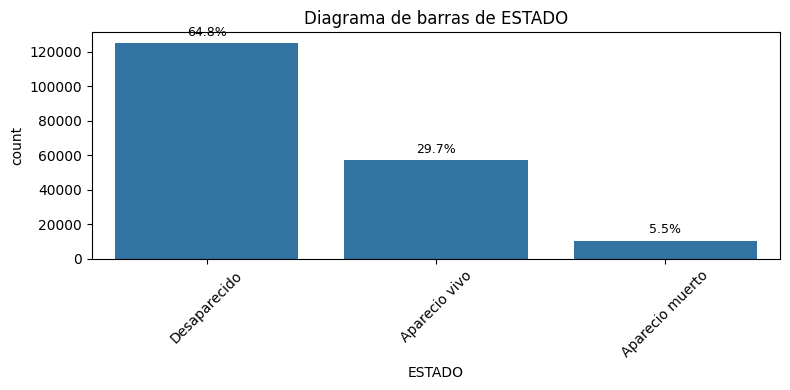

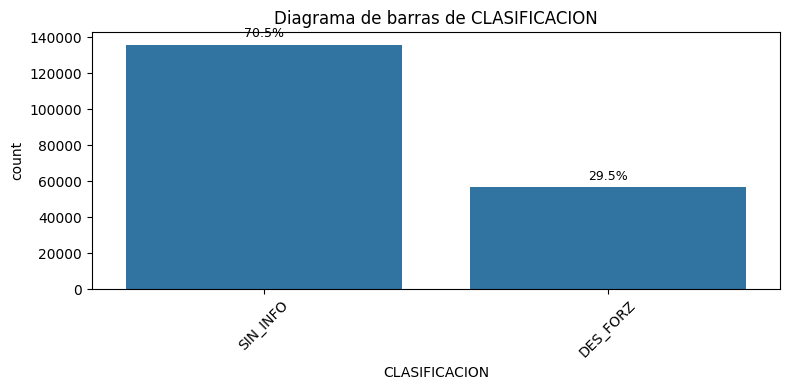

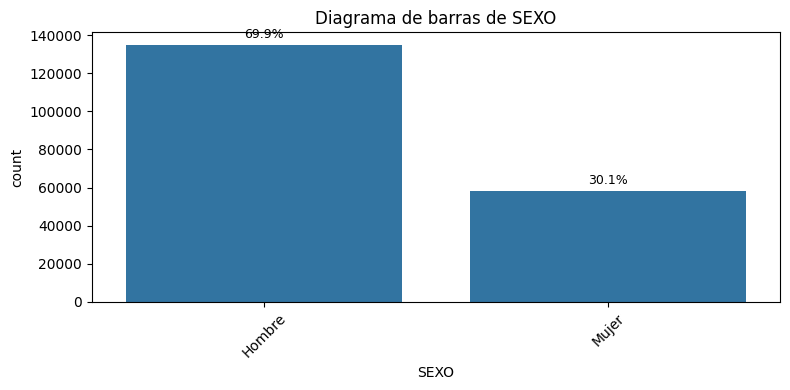

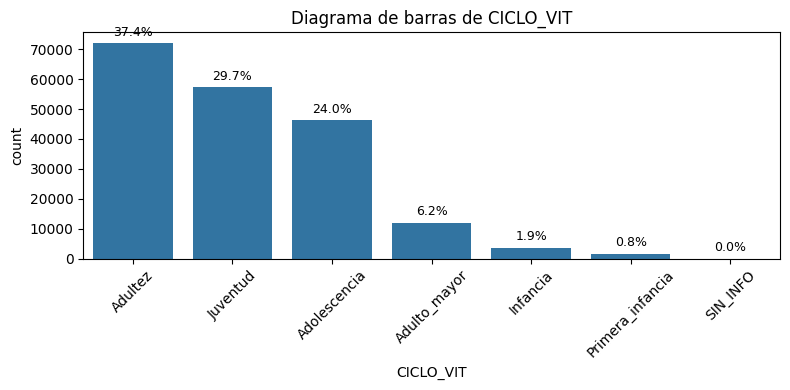

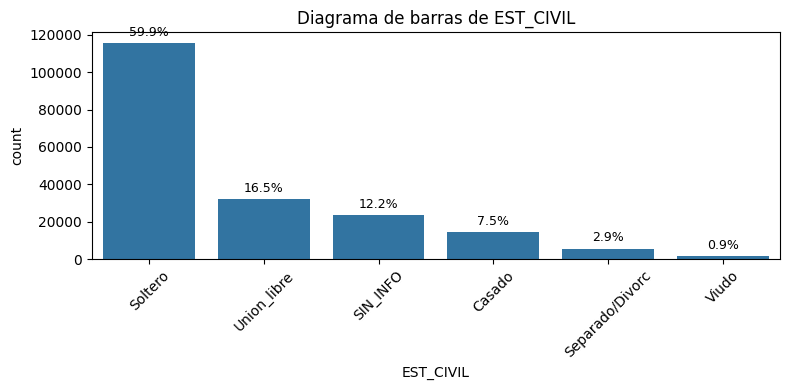

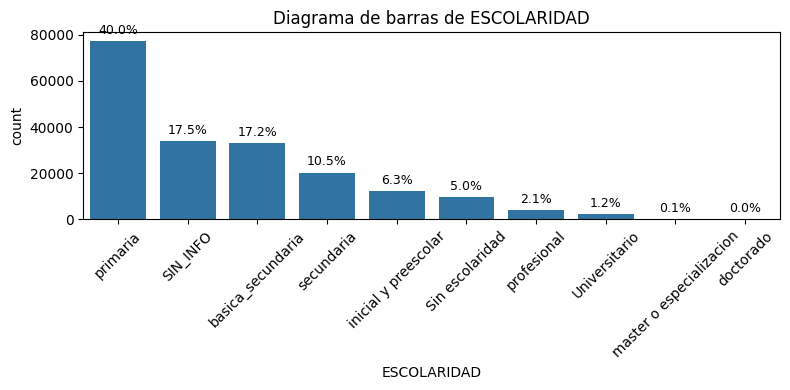

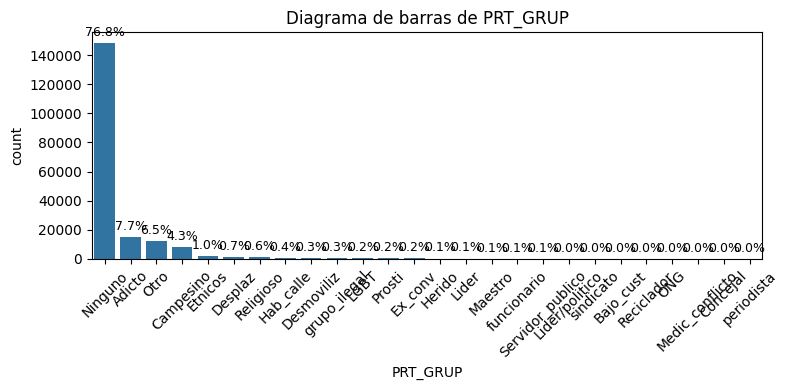

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Umbral máximo de categorías para graficar
max_categorias = 30

for column in train_barplot.columns:
    if train_barplot[column].nunique() <= max_categorias:
        plt.figure(figsize=(8, 4))
        ax = sns.countplot(data=train_barplot, x=column, order=train_barplot[column].value_counts().index)

        # Calcular total para porcentajes
        total = len(train_barplot[column])

        # Agregar los porcentajes sobre las barras
        for p in ax.patches:
            height = p.get_height()
            percentage = 100 * height / total
            ax.annotate(f'{percentage:.1f}%', 
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 3), textcoords='offset points')

        plt.title(f'Diagrama de barras de {column}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Separados por género

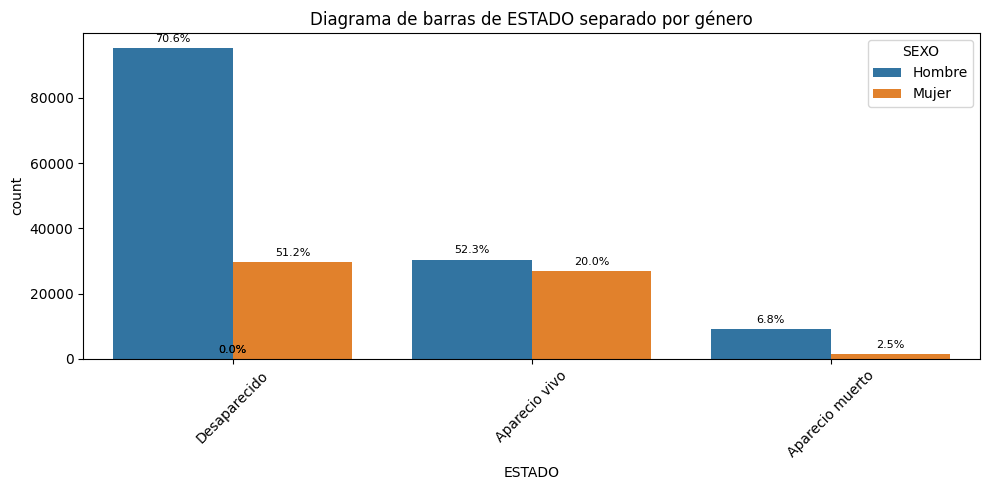

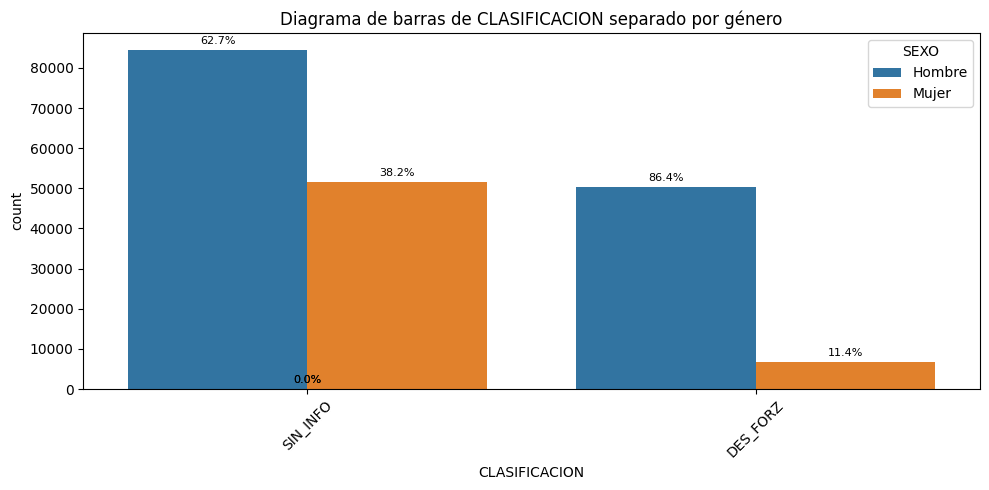

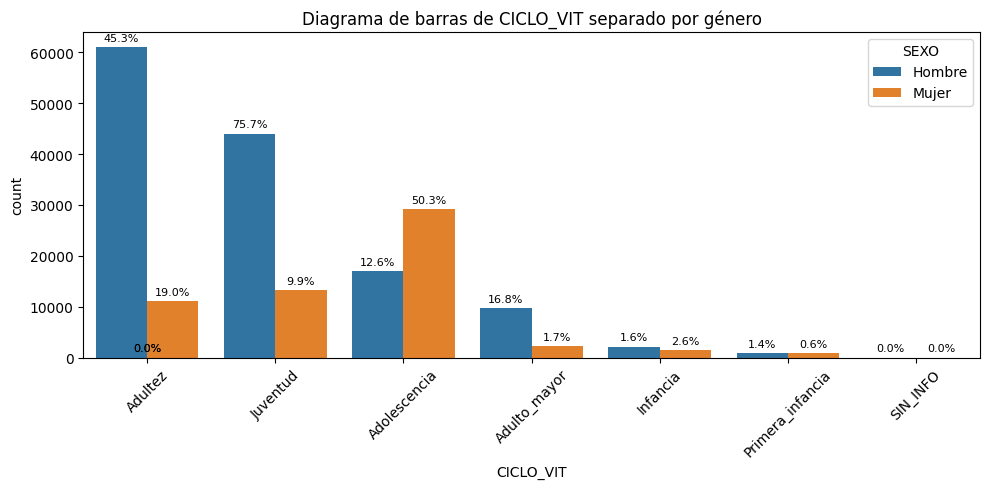

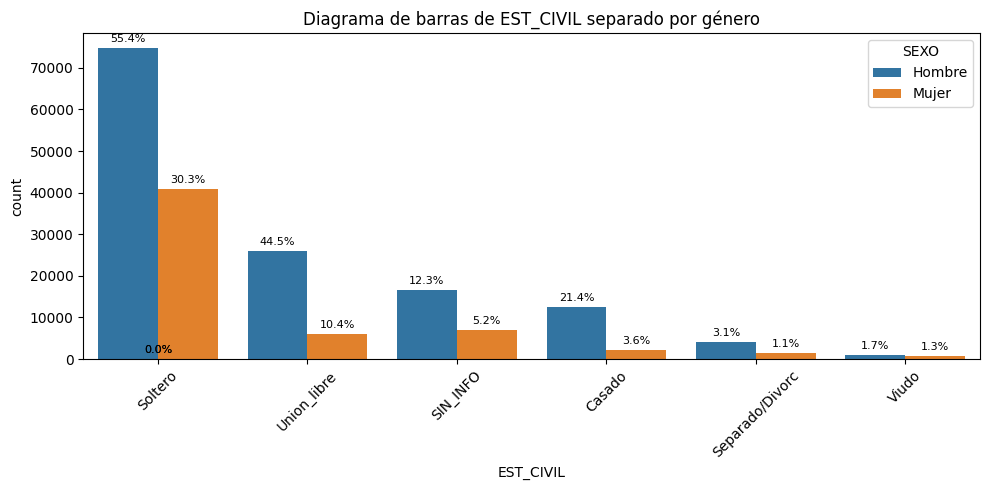

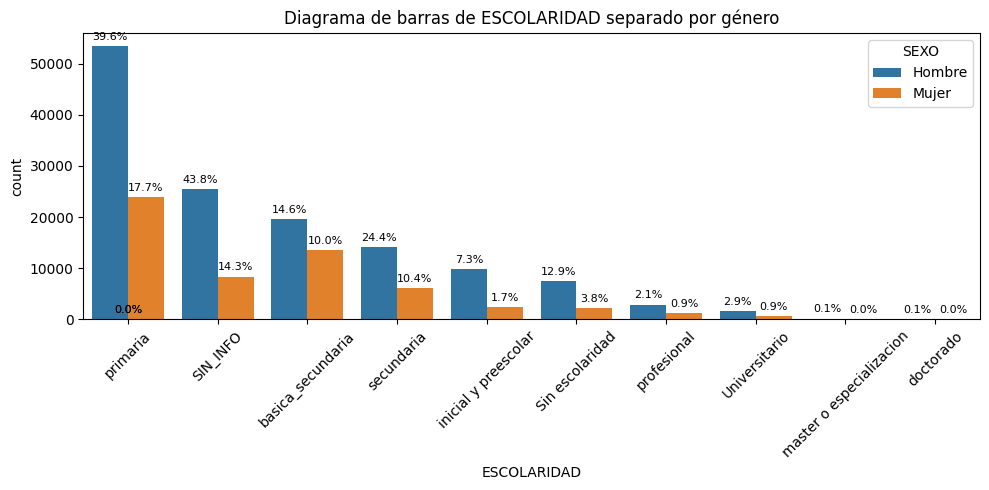

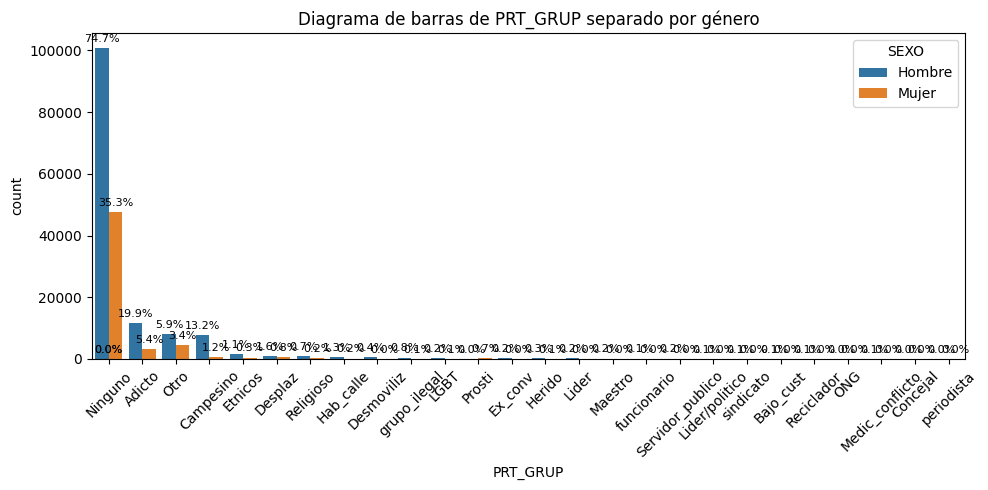

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Umbral máximo de categorías para graficar
max_categorias = 30

for column in train_barplot.columns:
    if column != 'SEXO' and train_barplot[column].nunique() <= max_categorias:
        plt.figure(figsize=(10, 5))
        ax = sns.countplot(data=train_barplot, x=column, hue='SEXO', 
                           order=train_barplot[column].value_counts().index)

        # Calcular total por grupo para porcentajes
        total_por_categoria = train_barplot.groupby([column, 'SEXO']).size().unstack(fill_value=0)
        total_genero = train_barplot['SEXO'].value_counts()

        # Agregar porcentajes sobre las barras
        for p in ax.patches:
            genero = p.get_facecolor()  
            height = p.get_height()
            x = p.get_x() + p.get_width() / 2.
            genero_label = p.get_label().split('_')[-1] if hasattr(p, 'get_label') else None

           
            genero_idx = int(ax.patches.index(p)) % len(train_barplot['SEXO'].unique())
            genero_name = ax.legend_.texts[genero_idx].get_text()
            porcentaje = 100 * height / total_genero[genero_name]
            
            ax.annotate(f'{porcentaje:.1f}%',
                        (x, height), ha='center', va='bottom', fontsize=8,
                        color='black', xytext=(0, 3), textcoords='offset points')

        plt.title(f'Diagrama de barras de {column} separado por género')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()





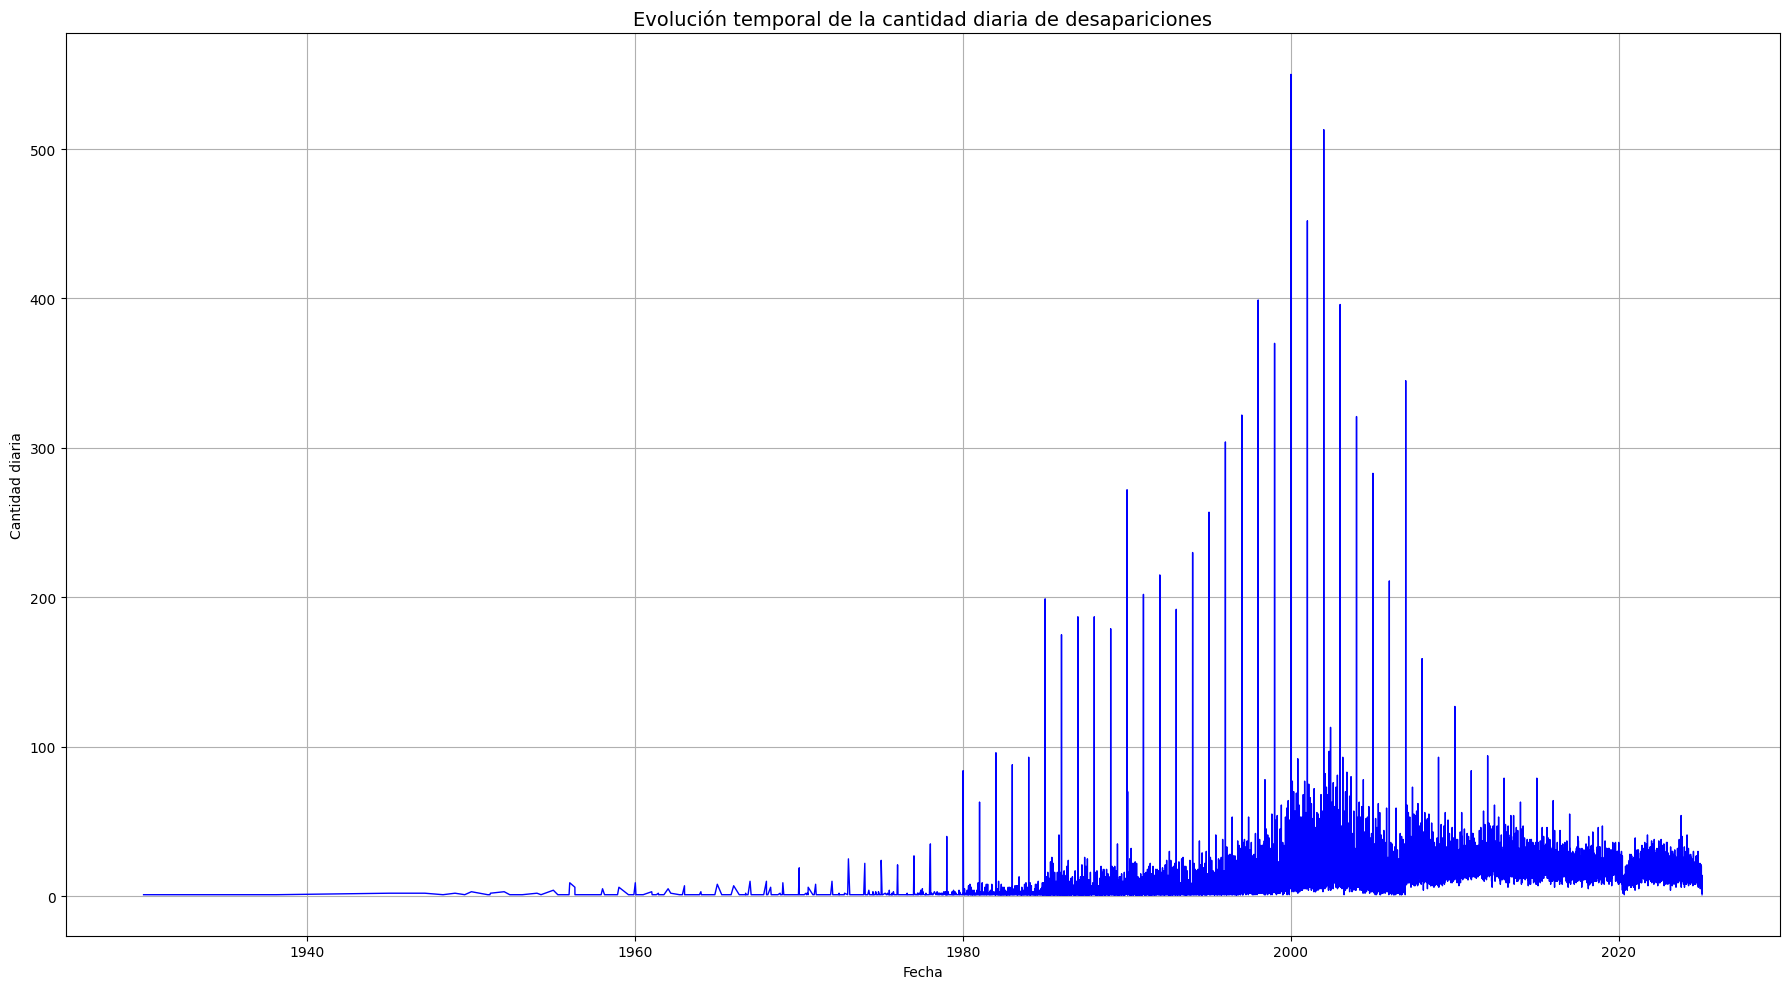

In [118]:
import matplotlib.pyplot as plt

# Agrupar por fecha y contar la cantidad de IDs por día
diaria_avg = train.groupby('FECHA_DES')['ID'].count().reset_index()


plt.figure(figsize=(18, 10))
plt.plot(diaria_avg['FECHA_DES'], diaria_avg['ID'], color='blue', linewidth=1)
plt.title('Evolución temporal de la cantidad diaria de desapariciones', fontsize=14)
plt.xlabel('Fecha')
plt.ylabel('Cantidad diaria')
plt.grid(True)
plt.tight_layout()
plt.show()


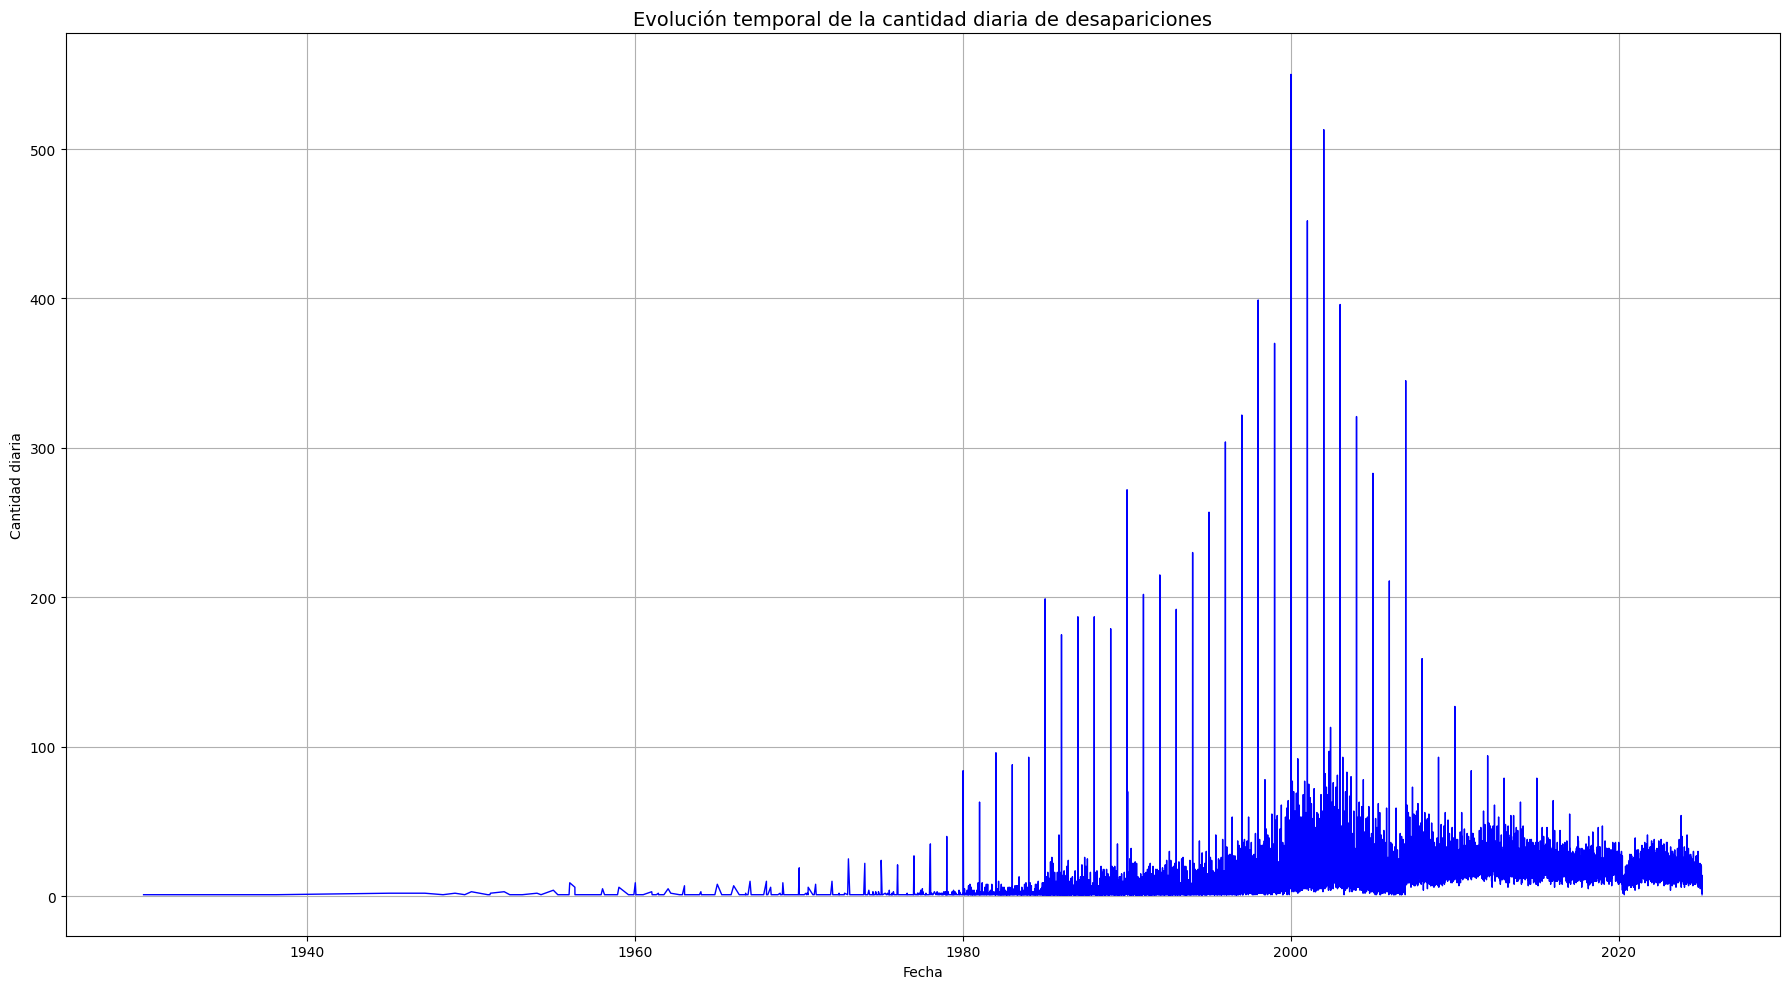

In [119]:
import matplotlib.pyplot as plt

# Agrupar por fecha y contar la cantidad de IDs por día
diaria_avg = train.groupby('FECHA_DES')['ID'].count().reset_index()


plt.figure(figsize=(18, 10))
plt.plot(diaria_avg['FECHA_DES'], diaria_avg['ID'], color='blue', linewidth=1)
plt.title('Evolución temporal de la cantidad diaria de desapariciones', fontsize=14)
plt.xlabel('Fecha')
plt.ylabel('Cantidad diaria')
plt.grid(True)
plt.tight_layout()
plt.show()

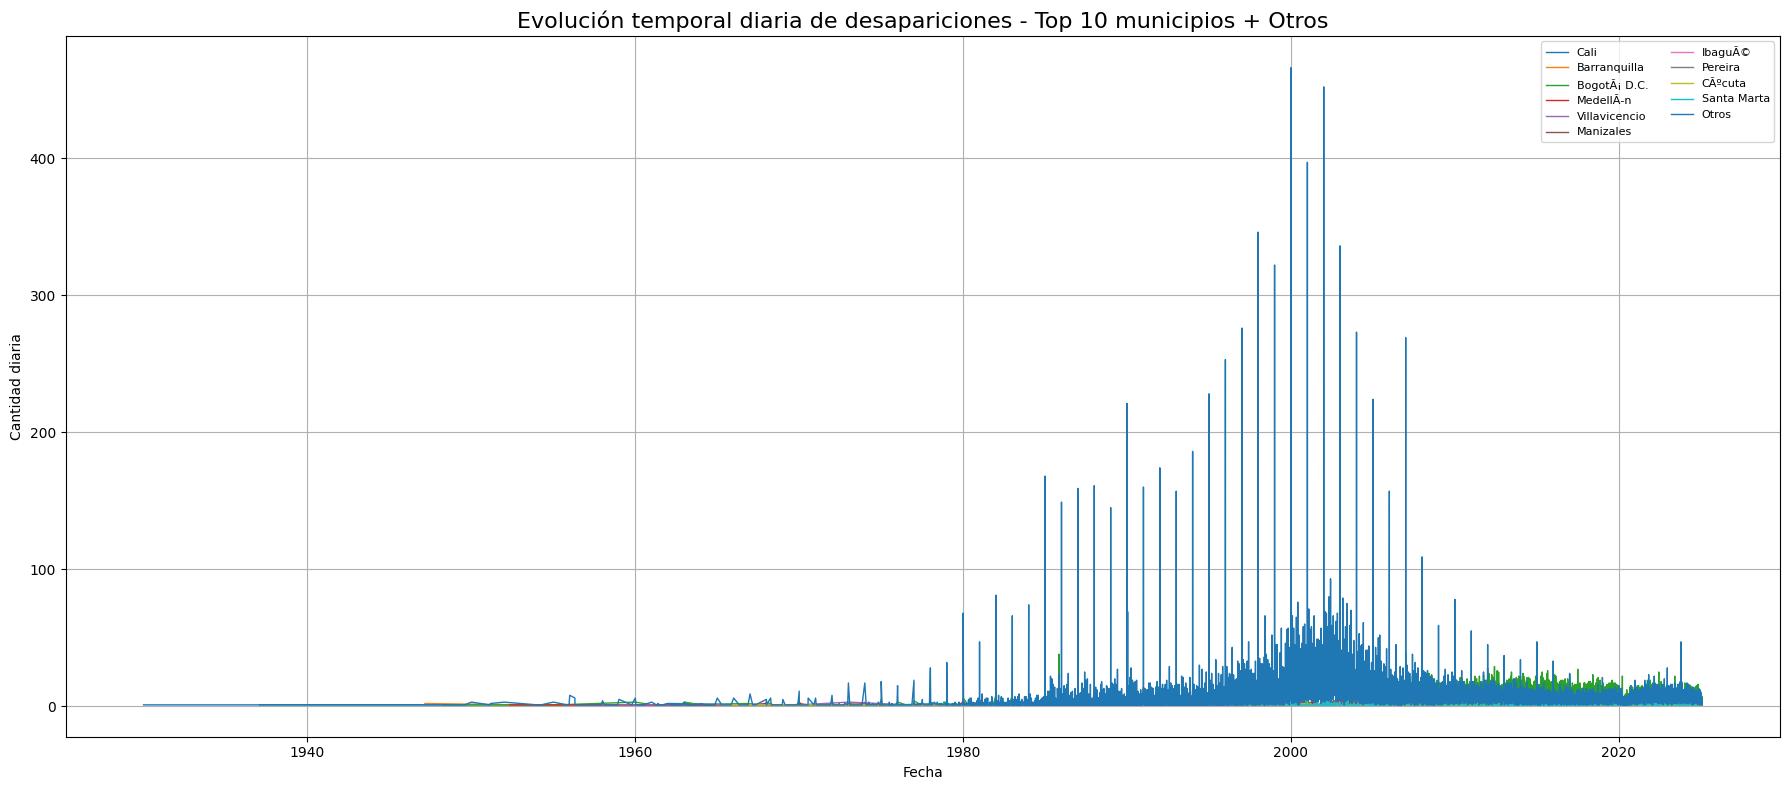

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar por fecha y municipio (conteo diario)
diaria_avg = train.groupby(['FECHA_DES', 'MPIO_DES'])['ID'].count().reset_index()


top_mpios = diaria_avg.groupby('MPIO_DES')['ID'].sum().nlargest(10).index


top_diaria_avg = diaria_avg[diaria_avg['MPIO_DES'].isin(top_mpios)]
otros_diaria_avg = diaria_avg[~diaria_avg['MPIO_DES'].isin(top_mpios)]


otros_agrupados = otros_diaria_avg.groupby('FECHA_DES')['ID'].sum().reset_index()
otros_agrupados['MPIO_DES'] = 'Otros'


grafico_df = pd.concat([top_diaria_avg, otros_agrupados], ignore_index=True)


plt.figure(figsize=(18, 8))


for municipio in grafico_df['MPIO_DES'].unique():
    datos = grafico_df[grafico_df['MPIO_DES'] == municipio]
    plt.plot(datos['FECHA_DES'], datos['ID'], label=municipio, linewidth=1)


plt.title('Evolución temporal diaria de desapariciones - Top 10 municipios + Otros', fontsize=16)
plt.xlabel('Fecha')
plt.ylabel('Cantidad diaria')
plt.grid(True)
plt.legend(loc='upper right', fontsize=8, ncol=2)
plt.tight_layout()
plt.show()




# Sólo desaparición forzada

In [122]:
train_barplot = train_barplot[train_barplot['CLASIFICACION'] == 'DES_FORZ']

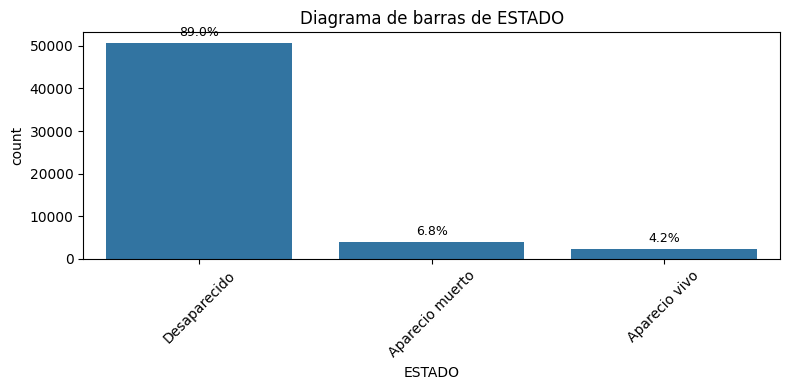

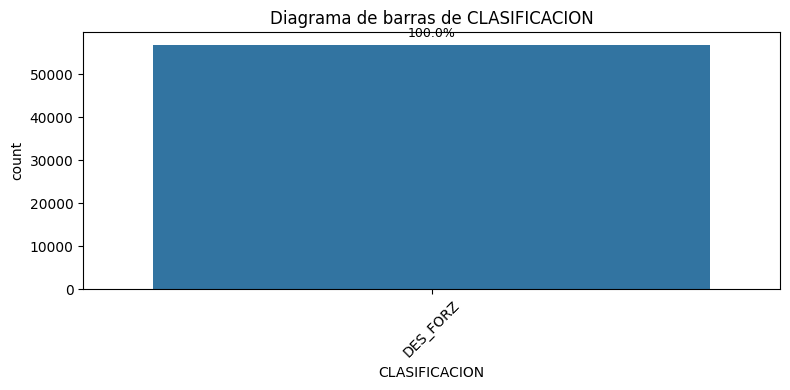

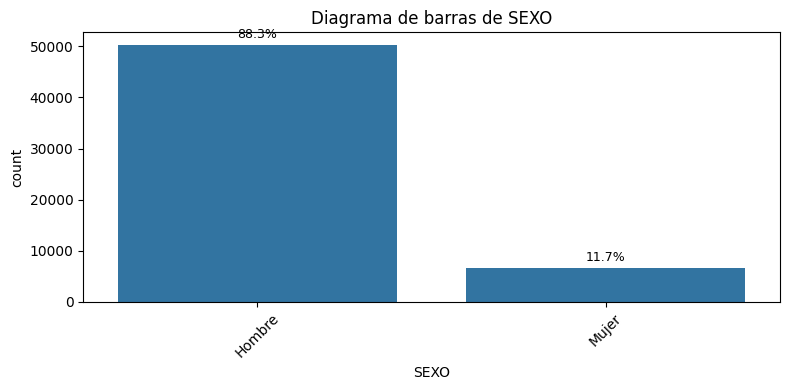

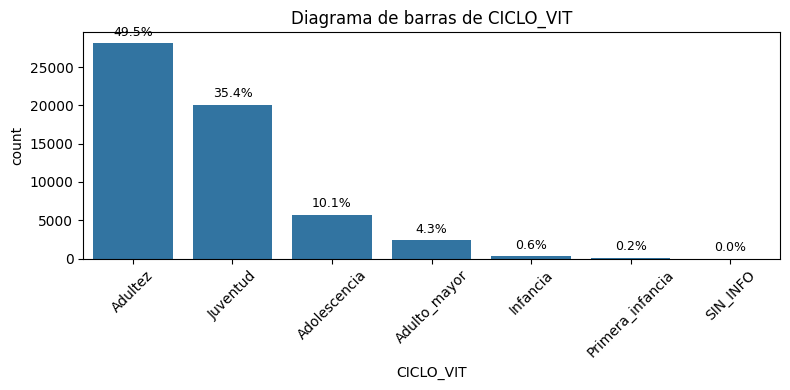

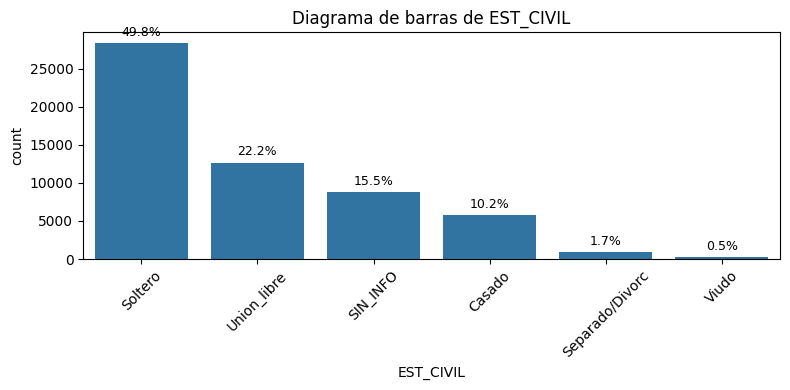

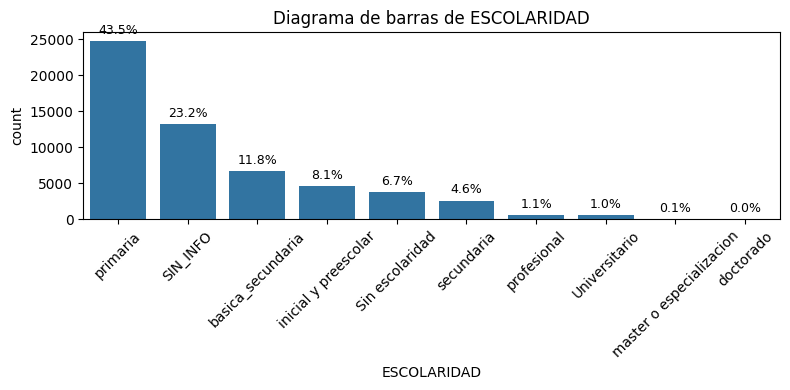

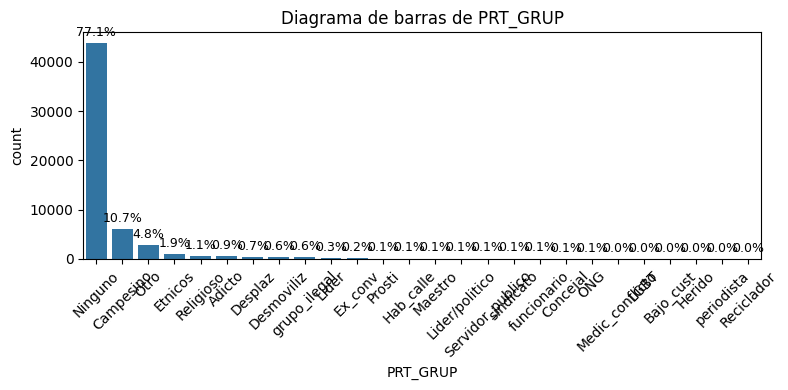

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Umbral máximo de categorías para graficar
max_categorias = 30

for column in train_barplot.columns:
    if train_barplot[column].nunique() <= max_categorias:
        plt.figure(figsize=(8, 4))
        ax = sns.countplot(data=train_barplot, x=column, order=train_barplot[column].value_counts().index)

        
        total = len(train_barplot[column])

        
        for p in ax.patches:
            height = p.get_height()
            percentage = 100 * height / total
            ax.annotate(f'{percentage:.1f}%', 
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 3), textcoords='offset points')

        plt.title(f'Diagrama de barras de {column}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

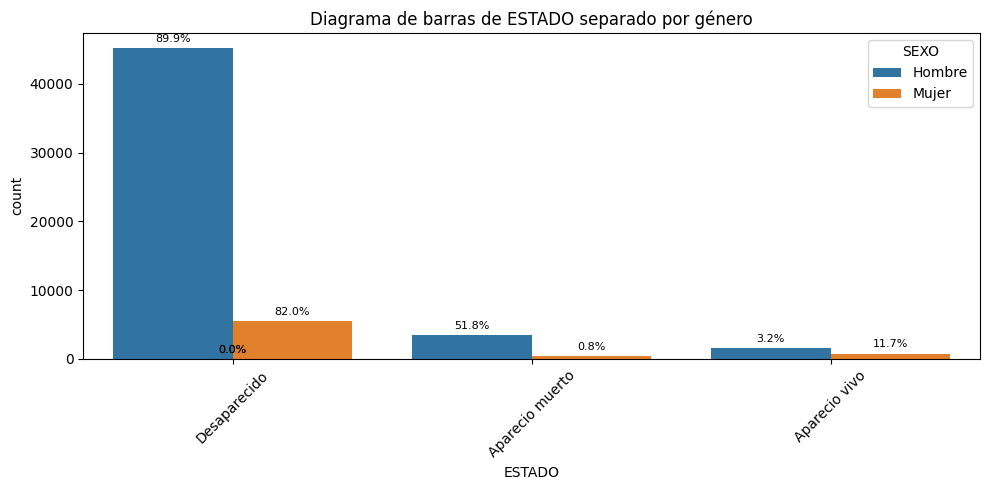

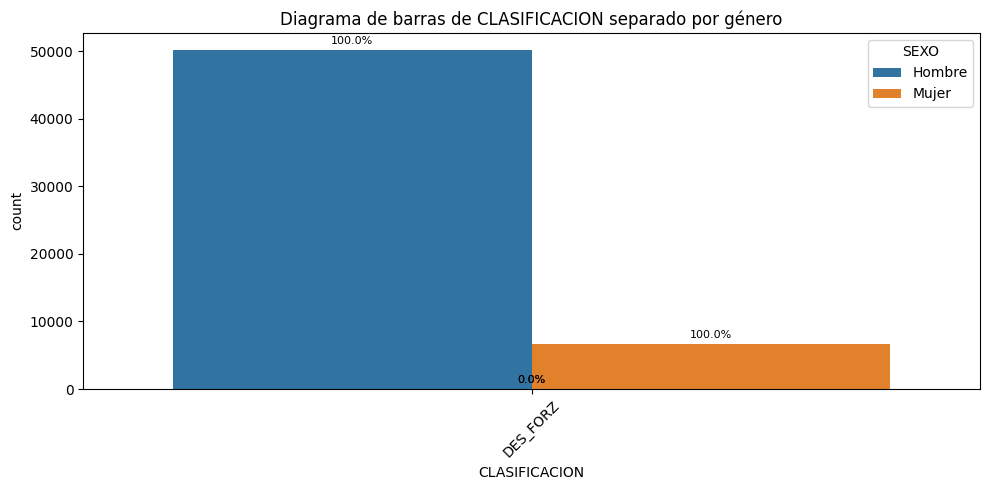

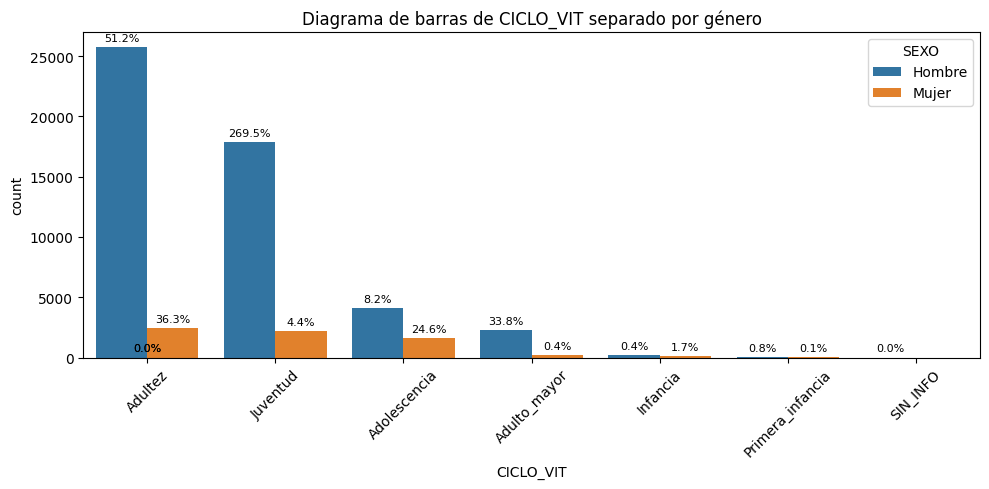

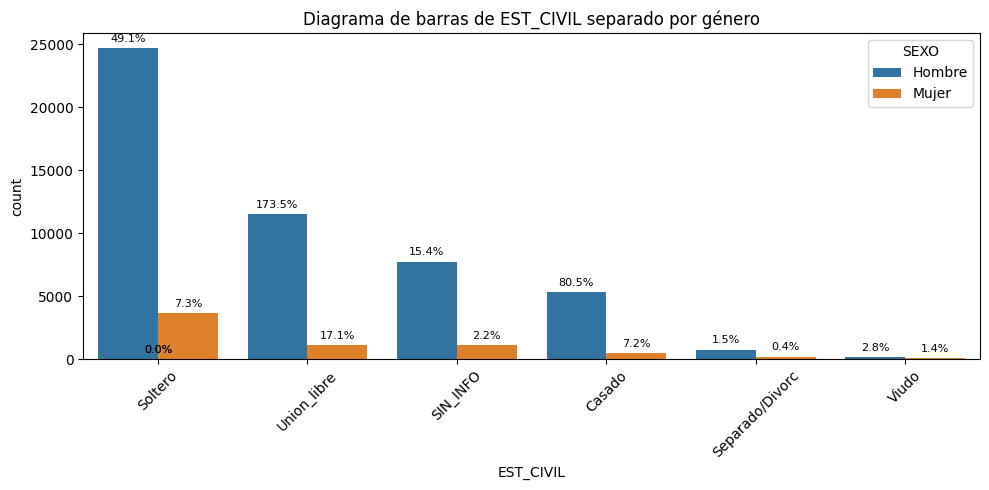

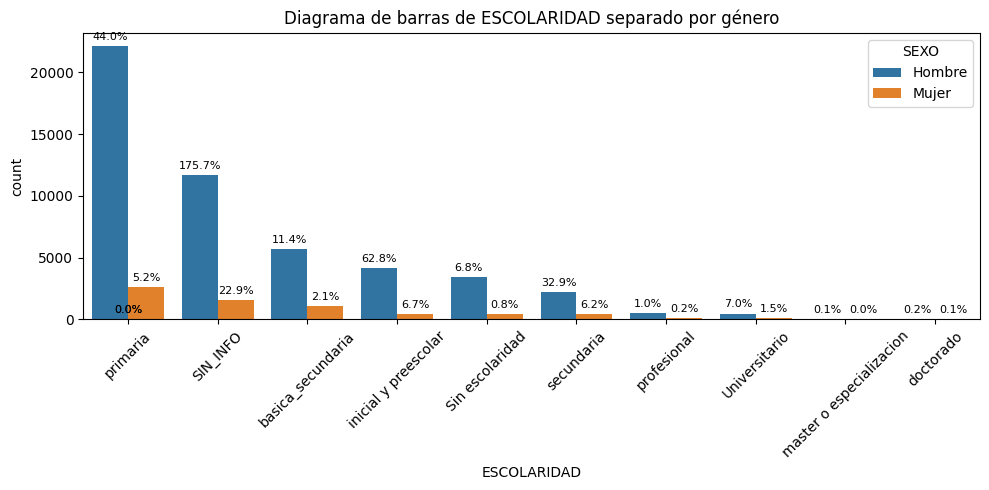

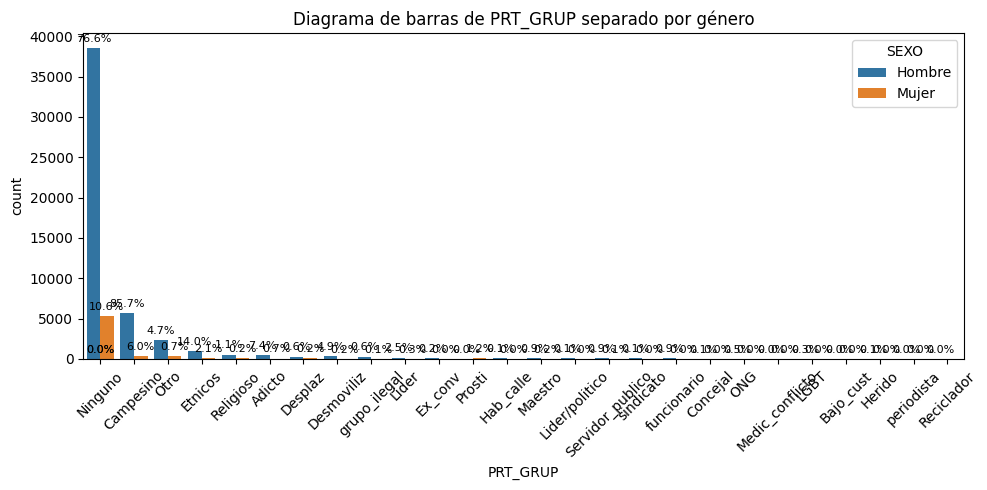

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Umbral máximo de categorías para graficar
max_categorias = 30

for column in train_barplot.columns:
    if column != 'SEXO' and train_barplot[column].nunique() <= max_categorias:
        plt.figure(figsize=(10, 5))
        ax = sns.countplot(data=train_barplot, x=column, hue='SEXO', 
                           order=train_barplot[column].value_counts().index)

        
        total_por_categoria = train_barplot.groupby([column, 'SEXO']).size().unstack(fill_value=0)
        total_genero = train_barplot['SEXO'].value_counts()

        
        for p in ax.patches:
            genero = p.get_facecolor()  
            height = p.get_height()
            x = p.get_x() + p.get_width() / 2.
            genero_label = p.get_label().split('_')[-1] if hasattr(p, 'get_label') else None

            
            genero_idx = int(ax.patches.index(p)) % len(train_barplot['SEXO'].unique())
            genero_name = ax.legend_.texts[genero_idx].get_text()
            porcentaje = 100 * height / total_genero[genero_name]
            
            ax.annotate(f'{porcentaje:.1f}%',
                        (x, height), ha='center', va='bottom', fontsize=8,
                        color='black', xytext=(0, 3), textcoords='offset points')

        plt.title(f'Diagrama de barras de {column} separado por género')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()





In [129]:
train = train[train['CLASIFICACION'] == 'DES_FORZ']

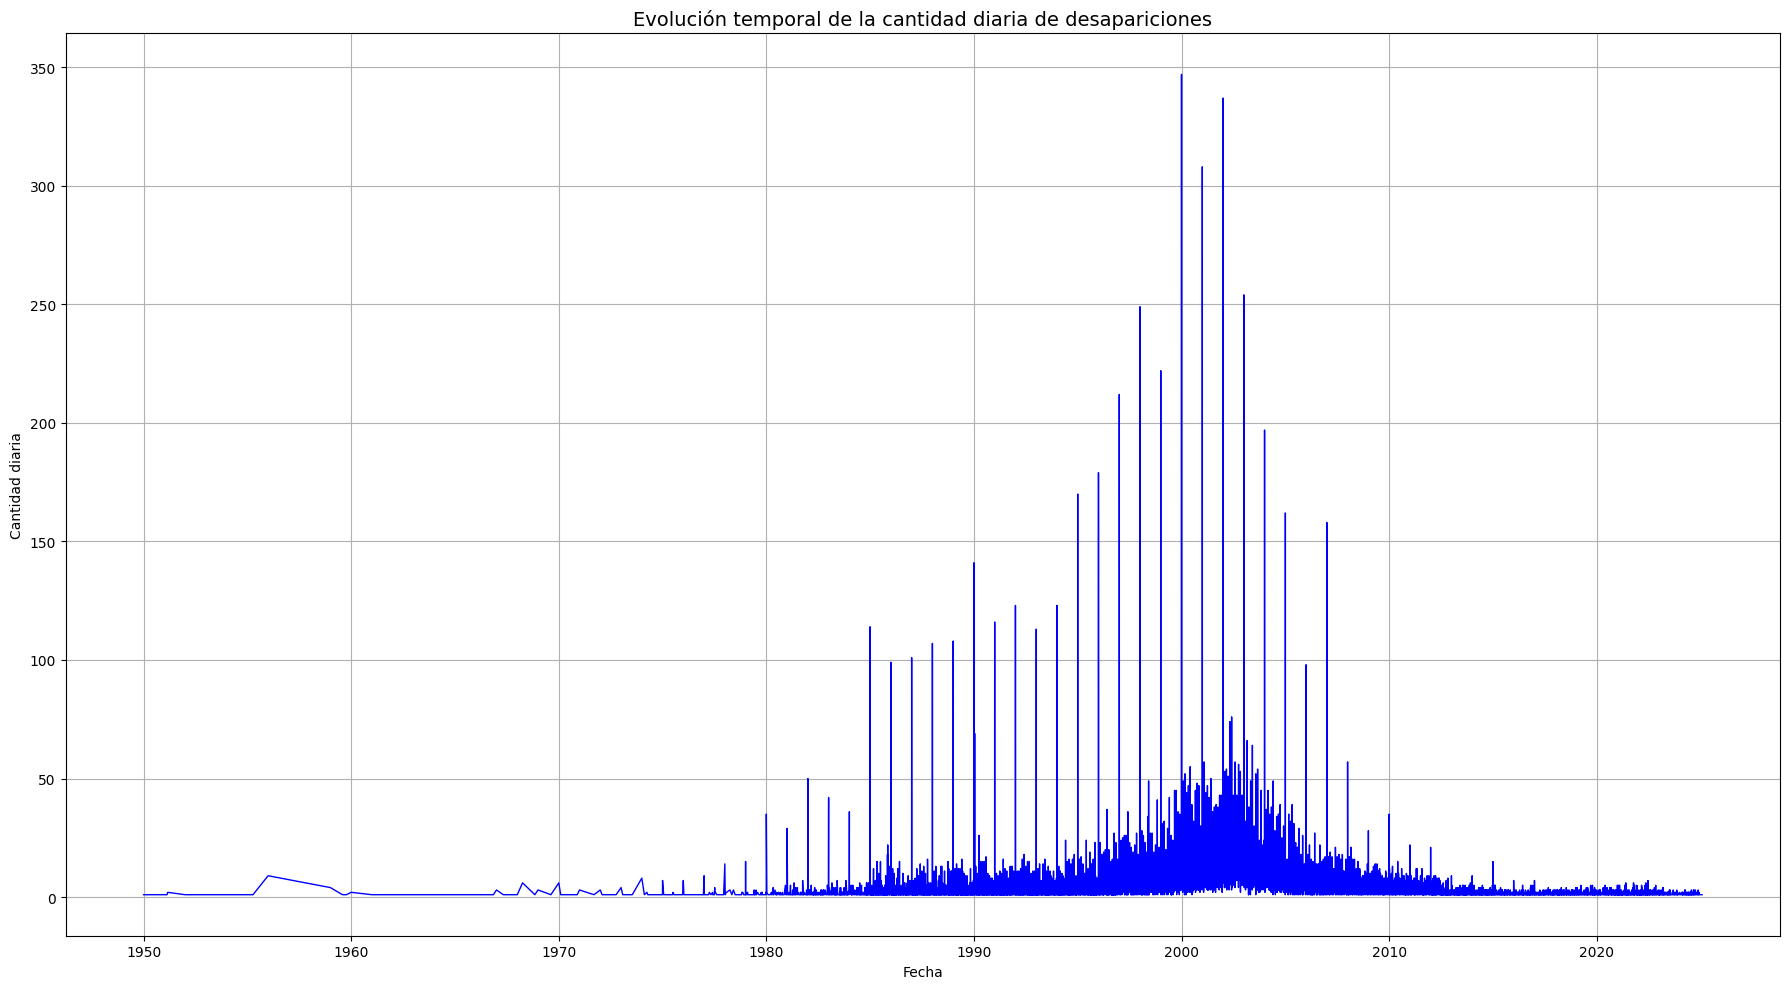

In [130]:
import matplotlib.pyplot as plt

# Agrupar por fecha y contar la cantidad de IDs por día
diaria_avg = train.groupby('FECHA_DES')['ID'].count().reset_index()


plt.figure(figsize=(18, 10))
plt.plot(diaria_avg['FECHA_DES'], diaria_avg['ID'], color='blue', linewidth=1)
plt.title('Evolución temporal de la cantidad diaria de desapariciones', fontsize=14)
plt.xlabel('Fecha')
plt.ylabel('Cantidad diaria')
plt.grid(True)
plt.tight_layout()
plt.show()


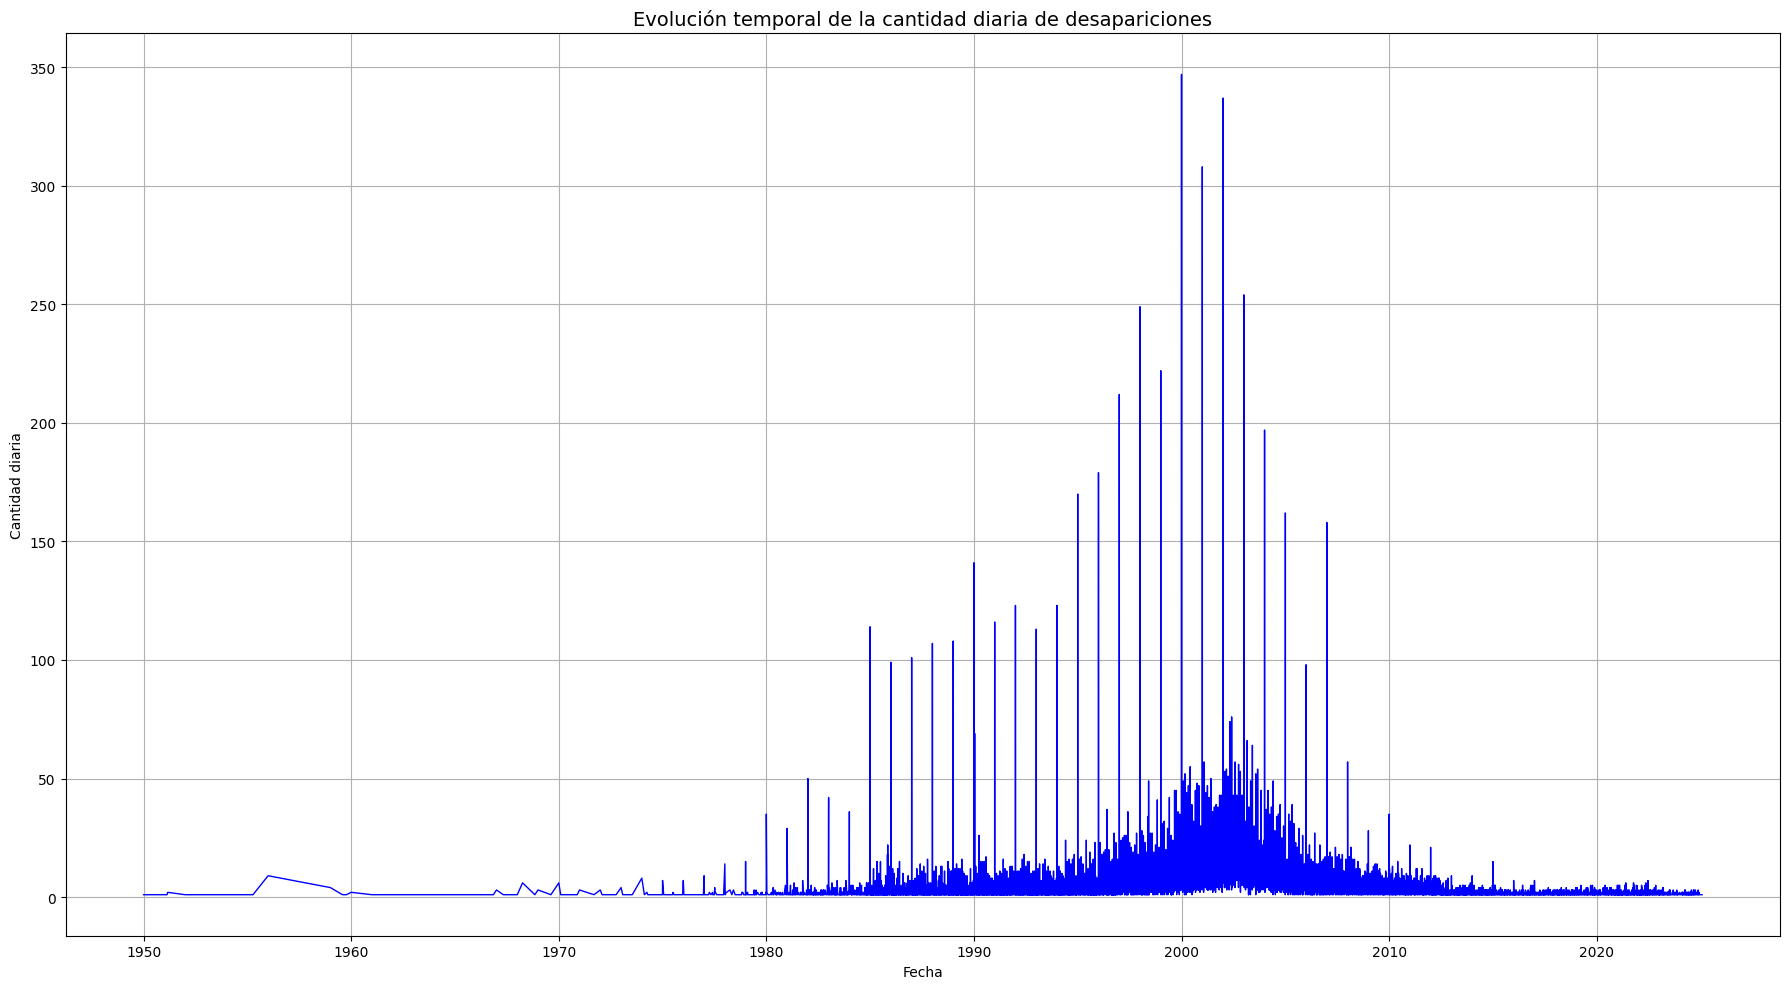

In [131]:
import matplotlib.pyplot as plt

# Agrupar por fecha y contar la cantidad de IDs por día
diaria_avg = train.groupby('FECHA_DES')['ID'].count().reset_index()


plt.figure(figsize=(18, 10))
plt.plot(diaria_avg['FECHA_DES'], diaria_avg['ID'], color='blue', linewidth=1)
plt.title('Evolución temporal de la cantidad diaria de desapariciones', fontsize=14)
plt.xlabel('Fecha')
plt.ylabel('Cantidad diaria')
plt.grid(True)
plt.tight_layout()
plt.show()

In [133]:
train

,ID,ENTIDAD,ESTADO,CLASIFICACION,SEXO,EDAD_GRUPO,EDAD_QUINQ,CICLO_VIT,EST_CIVIL,ESCOLARIDAD,...,MES_DES,DIA_DES,PAIS_DES,DEPTO,DEPTO_DES,MPIO,MPIO_DES,ZONA_DES,%_faltantes,rango_faltantes
12,14,Instituto Nacional de Medicina Legal y Ciencia...,Desaparecido,DES_FORZ,Hombre,Mayores_edad,(25 a 29),Juventud,Union_libre,primaria,...,diciembre,jueves,Colombia,11.0,BogotÃ¡ D.C.,11001.0,BogotÃ¡ D.C.,cabec_mpal,0.0,0 a 0.1%
70,72,Instituto Nacional de Medicina Legal y Ciencia...,Desaparecido,DES_FORZ,Hombre,Mayores_edad,(30 a 34),Adultez,Soltero,SIN_INFO,...,agosto,lunes,Colombia,50.0,Meta,50711.0,Vistahermosa,Rural,0.0,0 a 0.1%
73,75,Instituto Nacional de Medicina Legal y Ciencia...,Desaparecido,DES_FORZ,Hombre,Mayores_edad,(40 a 44),Adultez,SIN_INFO,SIN_INFO,...,enero,lunes,Colombia,73.0,Tolima,73268.0,Espinal,cabec_mpal,0.0,0 a 0.1%
78,84,Instituto Nacional de Medicina Legal y Ciencia...,Desaparecido,DES_FORZ,Hombre,Mayores_edad,(50 a 54),Adultez,Union_libre,Universitario,...,noviembre,viernes,Colombia,68.0,Santander,68001.0,Bucaramanga,SIN_INFO,0.0,0 a 0.1%
93,99,Instituto Nacional de Medicina Legal y Ciencia...,Aparecio muerto,DES_FORZ,Hombre,Mayores_edad,(25 a 29),Juventud,Soltero,SIN_INFO,...,marzo,sÃ¡bado,Colombia,999.0,Sin InformaciÃ³n,999.0,Sin InformaciÃ³n,SIN_INFO,0.0,0 a 0.1%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192883,193013,Unidad de BÃºsqueda de Personas Desaparecidas,Desaparecido,DES_FORZ,Hombre,Mayores_edad,(40 a 44),Adultez,SIN_INFO,SIN_INFO,...,junio,lunes,Colombia,27.0,ChocÃ³,27099.0,Bojaya,Rural,0.0,0 a 0.1%
192893,193023,Unidad de BÃºsqueda de Personas Desaparecidas,Desaparecido,DES_FORZ,Hombre,Mayores_edad,(40 a 44),Adultez,SIN_INFO,SIN_INFO,...,enero,sÃ¡bado,Colombia,19.0,Cauca,19137.0,Caldono,Rural,0.0,0 a 0.1%
192903,193033,Unidad de BÃºsqueda de Personas Desaparecidas,Desaparecido,DES_FORZ,Hombre,Mayores_edad,(30 a 34),Adultez,SIN_INFO,SIN_INFO,...,febrero,miÃ©rcoles,Sin InformaciÃ³n,999.0,PaÃ­s de la desapariciÃ³n sin informaciÃ³n,999.0,PaÃ­s de la desapariciÃ³n sin informaciÃ³n,cabec_mpal,0.0,0 a 0.1%
192906,193036,Unidad de BÃºsqueda de Personas Desaparecidas,Desaparecido,DES_FORZ,Hombre,Mayores_edad,(18 a 19),Juventud,Soltero,SIN_INFO,...,septiembre,martes,Colombia,23.0,CÃ³rdoba,23466.0,MontelÃ­bano,cabec_mpal,0.0,0 a 0.1%


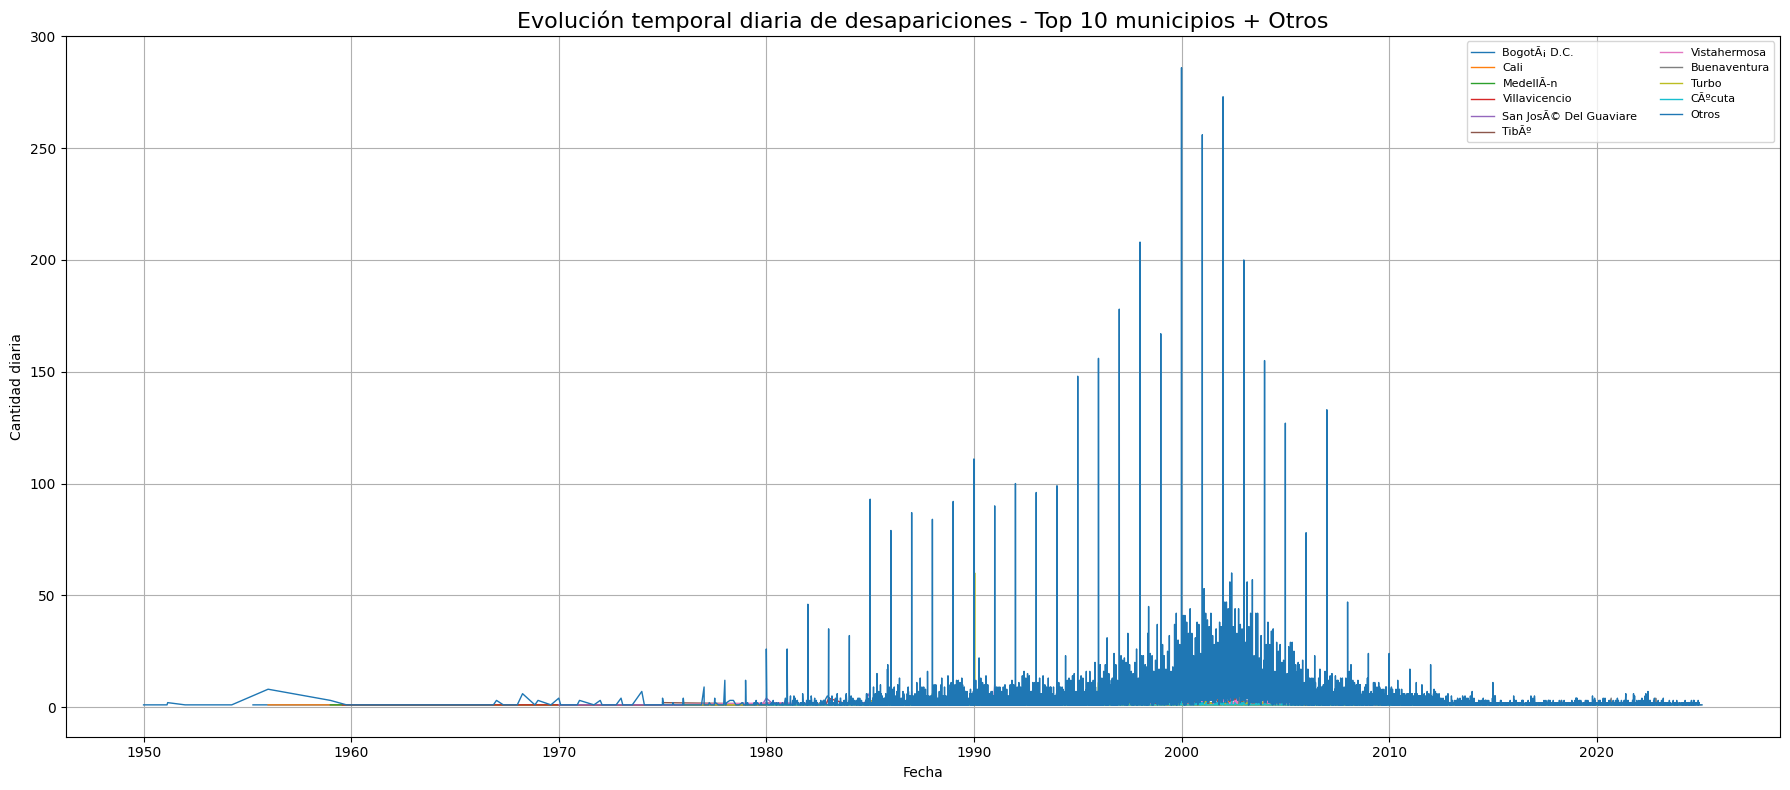

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar por fecha y municipio (conteo diario)
diaria_avg = train.groupby(['FECHA_DES', 'MPIO_DES'])['ID'].count().reset_index()

# Calcular total de desapariciones por municipio (suma total)
top_mpios = diaria_avg.groupby('MPIO_DES')['ID'].sum().nlargest(10).index

# Separar top 10 y otros
top_diaria_avg = diaria_avg[diaria_avg['MPIO_DES'].isin(top_mpios)]
otros_diaria_avg = diaria_avg[~diaria_avg['MPIO_DES'].isin(top_mpios)]

# Agrupar "otros" por fecha y renombrar el municipio como "Otros"
otros_agrupados = otros_diaria_avg.groupby('FECHA_DES')['ID'].sum().reset_index()
otros_agrupados['MPIO_DES'] = 'Otros'

grafico_df = pd.concat([top_diaria_avg, otros_agrupados], ignore_index=True)


plt.figure(figsize=(18, 8))

# Trazar una línea por cada municipio
for municipio in grafico_df['MPIO_DES'].unique():
    datos = grafico_df[grafico_df['MPIO_DES'] == municipio]
    plt.plot(datos['FECHA_DES'], datos['ID'], label=municipio, linewidth=1)

# Añadir leyenda, título y etiquetas
plt.title('Evolución temporal diaria de desapariciones - Top 10 municipios + Otros', fontsize=16)
plt.xlabel('Fecha')
plt.ylabel('Cantidad diaria')
plt.grid(True)
plt.legend(loc='upper right', fontsize=8, ncol=2)
plt.tight_layout()
plt.show()


